In [2]:
# welcome to Aestheta's getting started guide!
# Here we'll jump in, grab a tile and do some basic array manipulations


In [3]:
# <-- see that big button over there? thats how we run code blocks in googler colab! 
# go ahead and hit it! (or you can also press shift+ENTER)
print('Oh hello there!')

Oh hello there!


In [4]:
# our session on google colab should now be active. You're progamming on a computer in the cloud!

# first thing we'll do is make sure the current directory is set to the defaut 'content' directory of google colab
%cd /content/

# and then lets clone Aestheta's code base to our active session to this directory
!git clone https://github.com/NSCC-COGS/Aestheta.git

# if we run this code block twice, it will 'error' because its already there!
# if ever you want to restart your google colab session, navigate to Runtime>Factory Reset Runtime.. 

/content
Cloning into 'Aestheta'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (318/318), done.
remote: Compressing objects: 100% (230/230), done.
remote: Total 318 (delta 162), reused 210 (delta 81), pack-reused 0
Receiving objects: 100% (318/318), 5.40 MiB | 10.41 MiB/s, done.
Resolving deltas: 100% (162/162), done.


In [5]:
# Note, you can hit the folder icon to the left to see the Aestheta folder is now avilable 

# lets move the working directory to this Aestheta folder 
%cd /content/Aestheta/

# we can also attempt to pull down any changes that have been made to the git
# if you've made any changes to the git, you can pull it down now
!git pull

/content/Aestheta
Already up to date.


0 0 0


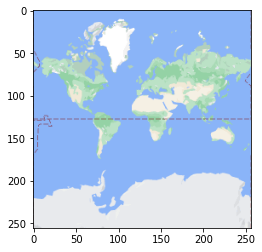

In [6]:
# now lets import the Aesthera Library
import Aestheta.Library.core as core

# with Aestheta imported, we can run the basic getTile() function
core.getTile(show=True)

3 3 3


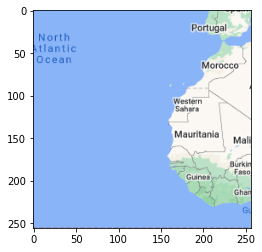

In [7]:
# everything in the Aestheta code base is available to you now!
# play arond and try running any functions available
# see the code for some examples of functions
# https://github.com/NSCC-COGS/Aestheta/blob/main/Library/core.py

# here we see get tile running on a different tile location
core.getTile(xyz=[3,3,3],show=True)

2 2 3


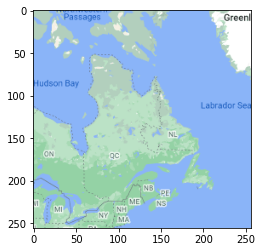

In [8]:
# we can also use floating point arguments to load tiles by lon/lat location
core.getTile(xyz=[-63.2,45.6,3],show=True)

2 2 3


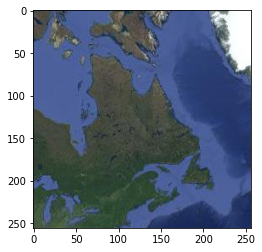

In [9]:
# we can get tiles from different sources
core.getTile(xyz=[-63.2,45.6,3], source='google_sat',show=True)

In [10]:
# instead of showing the tile, lets hold onto it as a numpy array
array = core.getTile(xyz=[-63.2,45.6,3], source='google_sat',show=False)
print(array)

2 2 3
[[[ 71  70  40]
  [ 78  76  53]
  [ 72  70  55]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 71  71  45]
  [ 75  74  53]
  [ 73  74  60]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 72  74  52]
  [ 72  73  55]
  [ 78  78  66]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 69  88  69]
  [ 69  88  69]
  [ 69  88  68]
  ...
  [ 27  45  95]
  [ 27  45  95]
  [ 27  45  95]]

 [[ 71  88  70]
  [ 70  87  68]
  [ 70  87  68]
  ...
  [ 27  45  95]
  [ 27  45  95]
  [ 27  45  95]]

 [[ 71  88  70]
  [ 70  87  68]
  [ 70  87  68]
  ...
  [ 27  45  95]
  [ 27  45  95]
  [ 27  45  95]]]


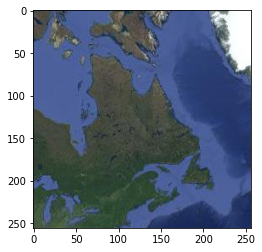

In [11]:
# we can still show it though matplotlib
from matplotlib import pyplot as plt
plt.imshow(array)
plt.show()

In [12]:
# we can access values in the array though numpy indexing
green_value = array[120,120,1]
print('pixel 120,120 green value:')
print(green_value)
print()

rgb_value = array[120,120,:]
print('pixel 120,120 red green and blue values:')
print(rgb_value)
print()

green_slice = array[119:122,119:122,0]
print('3x3 of pixels around pixel 120,120 green values:')
print(green_slice)
print()

pixel 120,120 green value:
76

pixel 120,120 red green and blue values:
[66 76 65]

3x3 of pixels around pixel 120,120 green values:
[[60 51 63]
 [63 66 60]
 [66 62 56]]



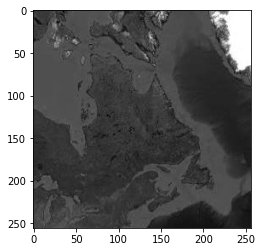

In [13]:
# we can also grab entire bands to make greyscale images
green_array = array[:,:,1]

plt.imshow(green_array, cmap='gray')
plt.show()

In [14]:
# we can find the minimum, maximum, and average of each band
rMin, rMax, rMean = array[:,:,0].min(), array[:,:,0].max(),array[:,:,0].mean()
print(rMin, rMax, rMean)

5 255 68.96905517578125


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


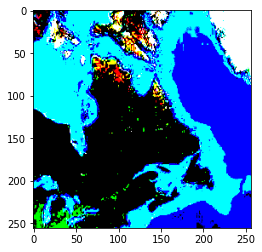

In [15]:
# and we can do creative things like, calculate the difference of each pixel from the average pixel value
dMean_array = array-array.mean()
plt.imshow(dMean_array)
plt.show()

-82.40194702148438 250.0


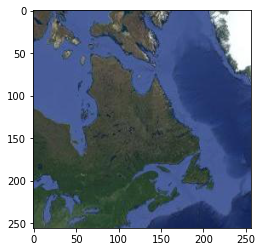

In [16]:
# lets rescale this to be between 0 and 1
dmMin = dMean_array.min()
dMean_array-=dmMin
dmMax = dMean_array.max()
dMean_array/=dmMax
print(dmMin, dmMax)
plt.imshow(dMean_array)
plt.show()

# the image is pretty similar to where we started

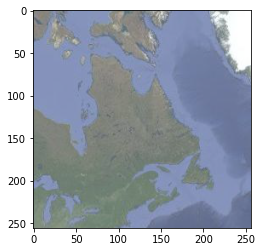

In [17]:
# lets try scaling the image in some other way
dMean_array-=-0.5
dMean_array/=dMean_array.max()
plt.imshow(dMean_array)
plt.show()

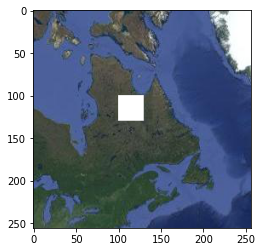

In [18]:
# we can modify pixels directly
array_copy = array.copy()
# here we set a box from pixel 100,100 to 130,130 to white
array_copy[100:130,100:130,:]=255
plt.imshow(array_copy)
plt.show()

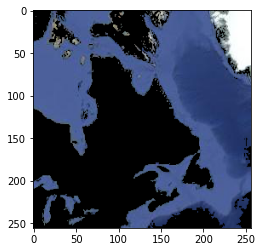

In [19]:
# or we can modify pixels conditionally
array_copy2 = array.copy()
# here we set any pixel with a blue value less than 100 to zero
array_copy2[array_copy2[:,:,2]<100]=0
plt.imshow(array_copy2)
plt.show()

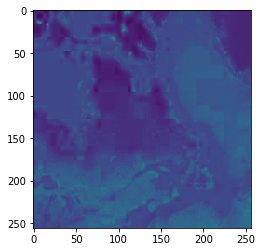

In [20]:
#we can compare one band to another
green_array = array[:,:,1]
red_array = array[:,:,0]

# lets compute the ratio of green and red
diff_array = green_array / red_array
diff_array = np.log(diff_array) # lets take the log scale so it shows up a little better
plt.imshow(diff_array)
plt.show()